In [302]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Helper

In [337]:
def plot(x, y, player_names=['Harry Kane'], hue=None, title=None, xlab=None, ylab=None,move_x_data_labs=0,move_y_data_labs=0,font='ultralight',title_font_size=12):
    if hue is not None:
        sns.scatterplot(x=x, y=y, hue=hue,s=30)
    else:
        sns.scatterplot(x=x, y=y,s=30, color='lightgrey')

    if title is None:
        plt.title(f"{x.name} vs {y.name} (2022/23)", fontsize=title_font_size)
    else:
        plt.title(f"{title} (2022/23)", fontsize=title_font_size)

    if xlab is None:
        plt.xlabel(f"{x.name}")
    else:
        plt.xlabel(xlab)

    if ylab is None:
        plt.ylabel(f"{y.name}")
    else:
        plt.ylabel(ylab)
    

    plt.suptitle(f"Data points: {len(x)}; x-axis avg.: {x.mean():.2f}; y-axis avg.: {y.mean():.2f}", y=.001, fontsize=8)
    plt.axhline(y=y.mean(), color='grey', linestyle='--', linewidth=0.8)
    plt.axvline(x=x.mean(), color='grey', linestyle='--', linewidth=0.8)
    plt.plot([], [], color='grey', linestyle='--', label='Sample Average')  # Invisible line to show in the legend
    plt.grid(True, color='lightgrey', linestyle='--', linewidth=0.4)
    
    # Highlight specific players
    for name in player_names:
        # Filter data for the specific player
        mask = df['Player'] == name
        x_player = x[mask]
        y_player = y[mask]
        
        # Plot data labels and points for each player
        sns.scatterplot(x=x_player, y=y_player, color='purple', edgecolor='purple')  # Replot specific points in black
        for i in range(len(x_player)):
            plt.text(x_player.iloc[i] + move_x_data_labs, y_player.iloc[i] + move_y_data_labs, name, fontsize=10, ha='center', color='black', weight=font)
    
    
    
    plt.show()

### Requirements
The goal is to plot midfilder on different attributes to indicate clusters that can be approved but domain knowledge.
Consider only players that have played a significant amount of matches and playing minutes.

In [324]:
# Load data
df = pd.read_csv('../data/fbref/player_stats.csv')
#df = df.set_index('unique_id')
df = df.loc[(df['Matches Played'] > 8 ) & (df['Playing Time_Minutes'] > 60) & (df['Global Pos'] == 'FW')]
df = df[df['League'] == 'EPL']
df.columns

# highlight players
player_names=['Harry Kane', 'Erling Haaland', 'Cristiano Ronaldo','Ollie Watkins','Bukayo Saka','Mohamed Salah','Jack Grealish']

## Questions


- Aerial Duels_Won vs Shots 
Aerial Duels_Won measures how effective a player is in winning headers, which often reflects their physical presence and ability to challenge for aerial balls.
- SoT% vs Carries_1/3 
shot accuracy at running / movement ?
- Key Passes vs Assists (GI: Shows vision that translates into goals)
Key passes (passes leading to shots) often reflect vision and understanding of the game, while assists directly translate that vision into goals
- Receiving_Succ vs Carries_PrgDist
ability to receive the ball in advanced positions and their ability to move the ball forward once in possession.
High Receiving Success, Low Progressive Carries: This could indicate a player who excels in holding the ball or quickly distributing it without carrying it forward themselves, like a pivot in midfield.
Low Receiving Success, High Progressive Carries: This might suggest a player who can drive forward with the ball but struggles to consistently get into good positions to receive it, possibly due to positioning or being tightly marked.
- Progressive Passes vs Passes_to_Penalty_Area (GI: Passes into penalty area)
Comparing these can show a player's intelligence in knowing when and where to progress the ball effectively.
- Carries_PrgC vs Carries_Dis (GI: Decision making for dribbling)
 A player who progresses the ball a lot but isn’t frequently dispossessed demonstrates effective decision-making when dribbling and ball retention under pressure. This comparison highlights their ability to choose the right moments to carry the ball.
- Carries_PrgC vs Carries_CPA (GI: High values reflect attacking intelligence. recognizing opportunities to take the ball into dangerous positions)
Progressive carries show how well a player moves the ball forward, while carries into the penalty area reflect attacking intelligence. A player with high values for both is often good at recognizing opportunities to take the ball into dangerous positions.
- Receiving_Succ vs Receiving_PrgR
A player’s ability to successfully receive the ball, especially in advanced or dangerous areas (progressive pass receives), reflects positioning intelligence and awareness of space.
- Touches_Att Pen vs Goals/Shot
This shows how efficiently a player converts their opportunities when they are active in the attacking third. A player with a high number of touches in the attacking penalty area who also has a high goals-per-shot ratio is often clinical and intelligent with their chances.

- Passes_to_Penalt_Area - Crs (David Raum - Flanken in den Strafraum)
- SCA Types_TO (Successful take-ons that lead to a shot attempt) vs Receiving_PrgR
- SCA Types_TO (Successful take-ons that lead to a shot attempt)vs Receiving_Succ 
- Receiving_Succ vs Carries_PrgDist

## Assists vs Key Passes
(GI: Shows vision that translates into goals)
Key passes (passes leading to shots) often reflect vision and understanding of the game, while assists directly translate that vision into goals

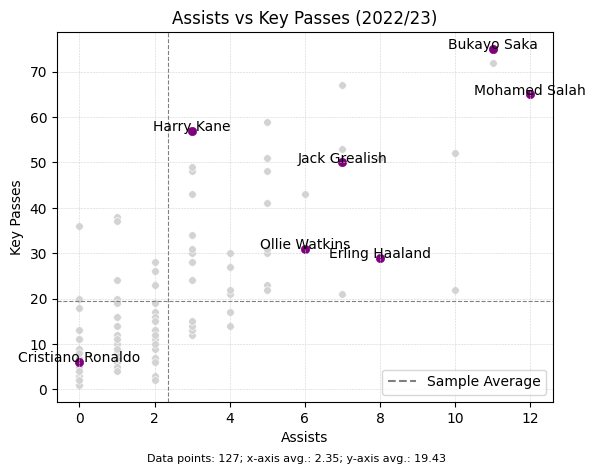

In [307]:
# 'Assists' vs 'Key Passes'
x = df['Assists']
y = df['Key Passes']
plot(x,y,player_names)

## Receiving_Succ vs Carries_PrgDist
ability to receive the ball in advanced positions and their ability to move the ball forward once in possession.
High Receiving Success, Low Progressive Carries: This could indicate a player who excels in holding the ball or quickly distributing it without carrying it forward themselves, like a pivot in midfield.
Low Receiving Success, High Progressive Carries: This might suggest a player who can drive forward with the ball but struggles to consistently get into good positions to receive it, possibly due to positioning or being tightly marked.

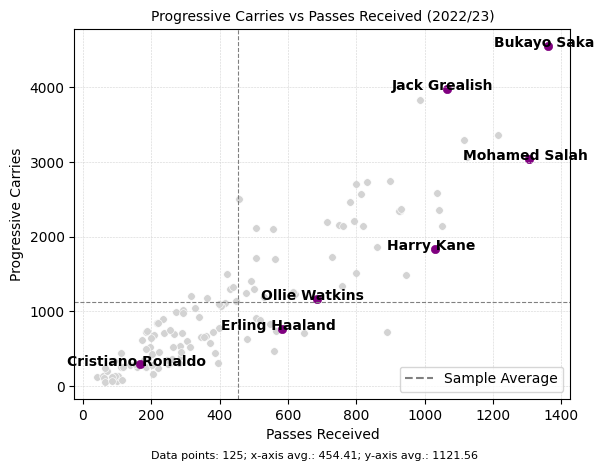

In [342]:
# Receiving_Succ vs Carries_PrgDist
x = df['Receiving_Succ']
y = df['Carries_PrgDist']

plot(x, y, player_names,
     title='Progressive Carries vs Passes Received',
     ylab='Progressive Carries',
     xlab='Passes Received', move_x_data_labs= -11, move_y_data_labs= -11,
     font='bold',
     title_font_size=10)

## Progressive Passes vs Passes_to_1/3

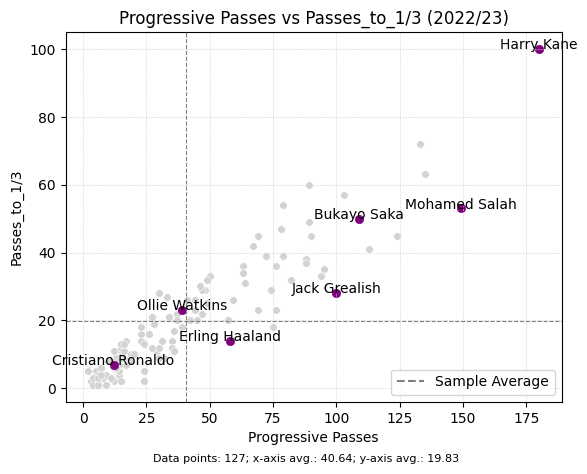

In [309]:
# Progressive Passes vs Passes_to_1/3
x = df['Progressive Passes']
y = df['Passes_to_1/3']
plot(x,y,player_names)

## Progressive Passes vs Passes_to_Penalty_Area
Comparing these can show a player's intelligence in knowing when and where to progress the ball effectively.

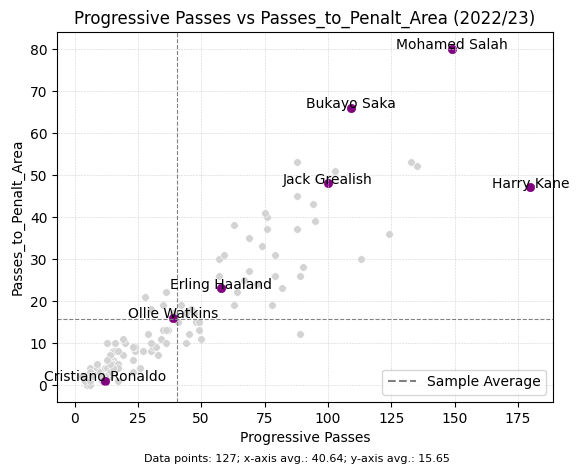

In [310]:
# Progressive Passes vs Passes_to_Penalty_Area
x = df['Progressive Passes']
y = df['Passes_to_Penalt_Area']
plot(x,y,player_names)

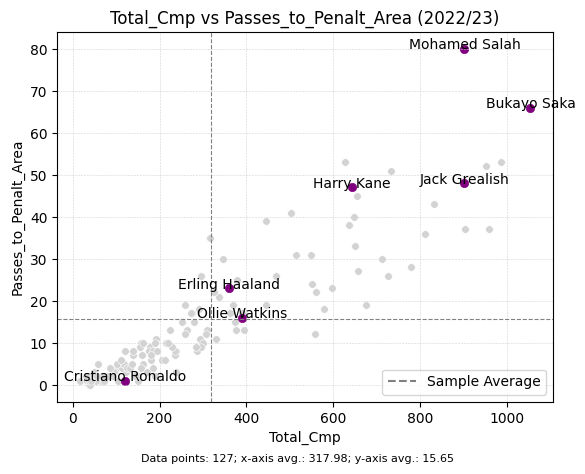

In [311]:
# Total completed passes vs Passes_to_Penalty_Area
x = df['Total_Cmp'] # completes passes
y = df['Passes_to_Penalt_Area']
plot(x,y,player_names)

## Carries_PrgC vs Carries_Dis 
(GI: Decision making for dribbling)
A player who progresses the ball a lot but isn’t frequently dispossessed demonstrates effective decision-making when dribbling and ball retention under pressure. This comparison highlights their ability to choose the right moments to carry the ball.

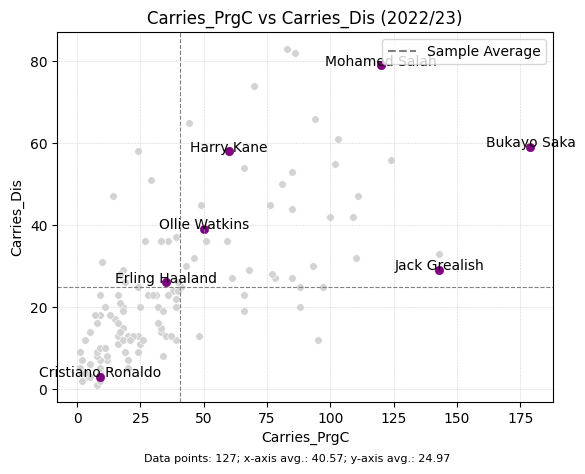

In [312]:
# Carries_PrgC vs Carries_Dis (lost ball at progressive carry)
x = df['Carries_PrgC'] # number of prog. carries
y = df['Carries_Dis'] # lost ball
plot(x,y,player_names)

## Progressive Carries vs Progressive Carry distance

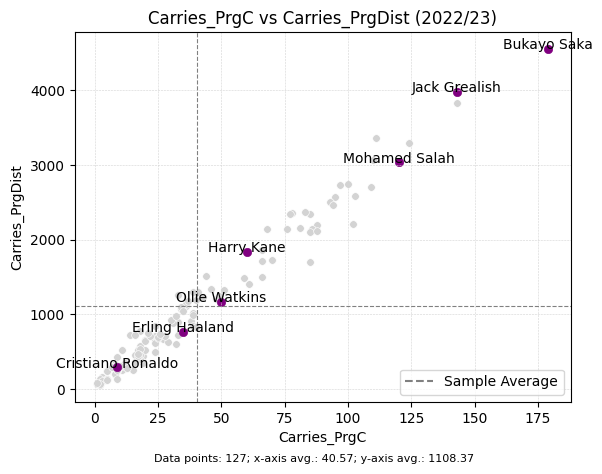

In [313]:
# Carries_PrgC vs Carries_Dis (lost ball at progressive carry)
x = df['Carries_PrgC'] # number of prog. carries
y = df['Carries_PrgDist'] # distance 
plot(x,y,player_names)

##  Progressive Carries vs Progressive Carry distance per Progressive Carries
- at least 5 progressive carries

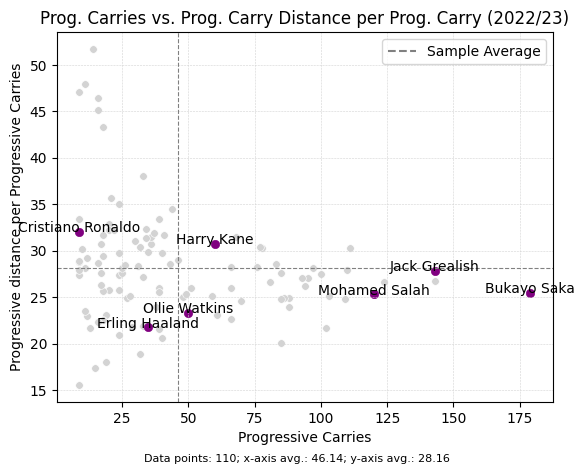

In [314]:
# minimum of 5 progressive carries 

temp_df = df[df['Carries_PrgC'] > 8]
x = temp_df['Carries_PrgC'] # number of prog. carries
y = temp_df['Carries_PrgDist'] / temp_df['Carries_PrgC']

plot(x,y,player_names,title='Prog. Carries vs. Prog. Carry Distance per Prog. Carry',
     xlab='Progressive Carries', ylab='Progressive distance per Progressive Carries')

## Progressive Carries vs. Progr.Carries into PA
(GI: High values reflect attacking intelligence. recognizing opportunities to take the ball into dangerous positions)
Progressive carries show how well a player moves the ball forward, while carries into the penalty area reflect attacking intelligence. A player with high values for both is often good at recognizing opportunities to take the ball into dangerous positions.

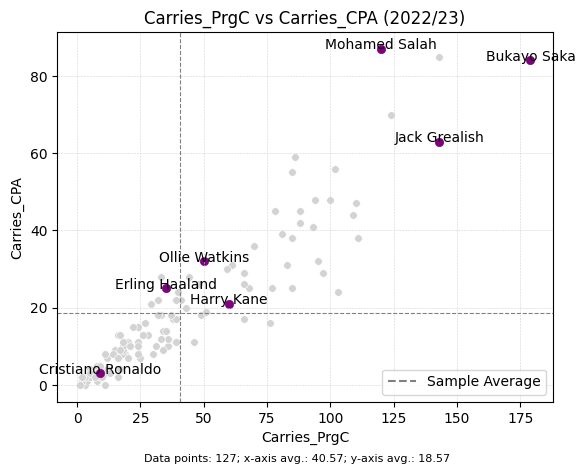

In [315]:
# Carries_PrgC vs Carries_Dis (lost ball at progressive carry)
x = df['Carries_PrgC'] # number of prog. carries
y = df['Carries_CPA'] # distance 
plot(x,y,player_names)

## Progressive Carries vs. Progr.Carries into PA per Progressive Carries
- assess the efficiency of converting progressive carries into penalty area passes 
    - efficiency of turning progressive carries into penetrating passes
- players with more carries might not necessarily be the most efficient at converting them into penalty area passes
- Defenders or deep-lying Midfielders:
    - tend to carry the ball forward but might not as involved in the final third (passing into the penalty area)
    - the number of carries increases, their efficiency in creating dangerous passes might decrease
    - decreasising log function

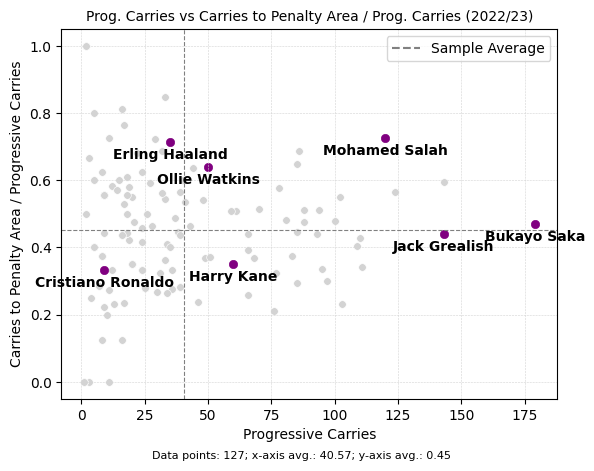

In [316]:
# Carries_PrgC vs Carries_Dis (lost ball at progressive carry)

x = df['Carries_PrgC'] # number of prog. carries
y = (df['Carries_CPA'] / df['Carries_PrgC']) # passes into penalty area
plot(x, y, player_names,
     title='Prog. Carries vs Carries to Penalty Area / Prog. Carries',
     ylab='Carries to Penalty Area / Progressive Carries',
     xlab='Progressive Carries',move_y_data_labs=-0.05,
     font='bold',
     title_font_size=10)

## Take On Defenders by dribbling vs Successful Take On Defenders by dribbling

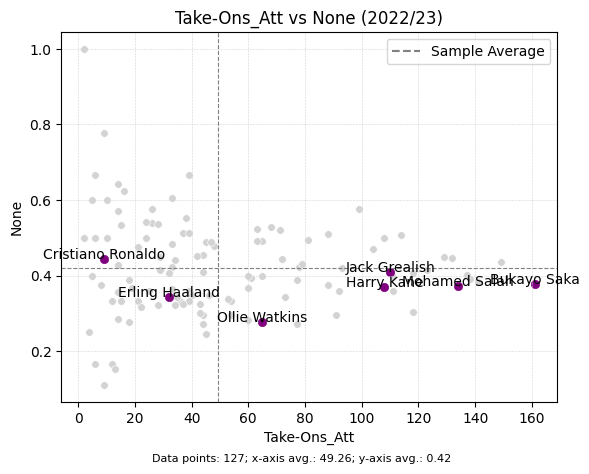

In [317]:
x = df['Take-Ons_Att'] # number of prog. carries
y = df['Take-Ons_Succ'] / df['Take-Ons_Att']  # passes into penalty area
plot(x,y,player_names)


## Histogram Carries_PrgDist

<Axes: xlabel='Carries_PrgDist', ylabel='Density'>

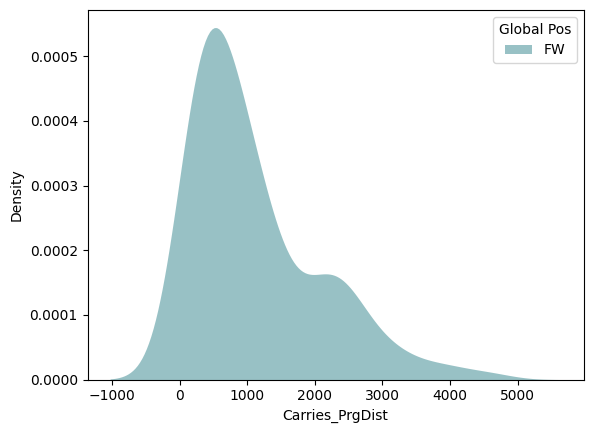

In [318]:
sns.kdeplot(data=df,x='Carries_PrgDist', hue="Global Pos",
            fill=True, common_norm=False, palette="crest",
   alpha=.5, linewidth=0,)

## Kernel density plot - Carries_PrgDist

<Axes: xlabel='Carries_PrgDist', ylabel='Carries_PrgC'>

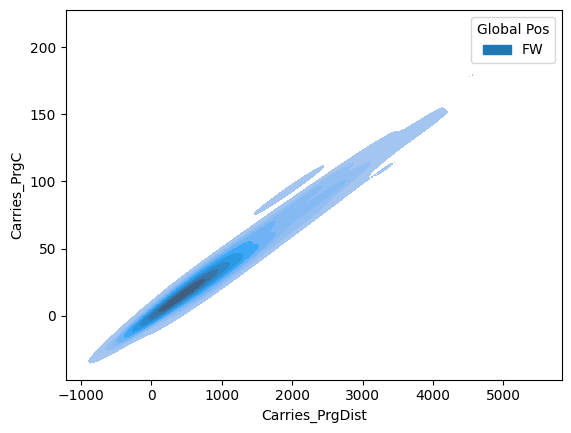

In [319]:
sns.kdeplot(
    data=df, x="Carries_PrgDist", y="Carries_PrgC", hue="Global Pos", fill=True,
)

## Carries_PrgC vs Carries_Dis

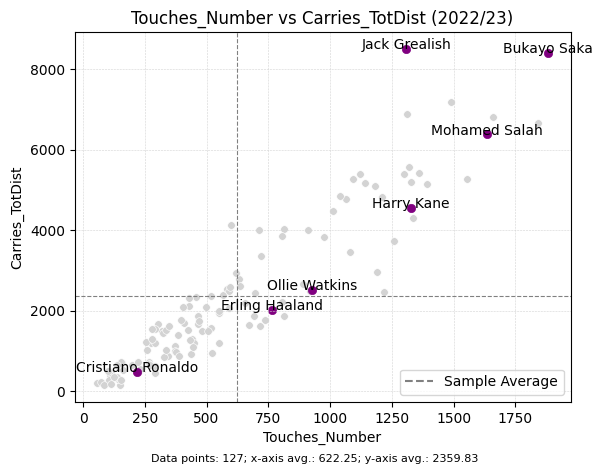

In [320]:
# Carries_PrgC vs Carries_Dis (lost ball at progressive carry)
x = df['Touches_Number'] # number of prog. carries
y = df['Carries_TotDist'] # distance 
plot(x,y,player_names)

## Touches_Number vs Carries_TotDist

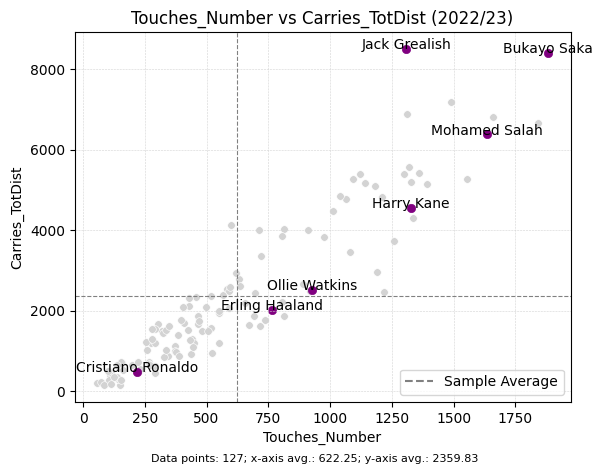

In [321]:
x = df['Touches_Number'] # number of prog. carries
y = df['Carries_TotDist'] # distance 
plot(x,y,player_names)


## Nkunku and Simons
- nkunku id: 
- simons id: 

In [322]:
# load and set index
df = pd.read_csv('../data/fbref/player_stats.csv')
df = df.set_index(df['Player'], drop=True)
df = df.fillna(0)

# create player info
player_info_cols = ['unique_id','Season', 'League', 'Team', 'Player', 'Nation', 'Pos','Global Pos', 'Age','Matches Played','Playing Time_Starts','Playing Time_Min','Playing Time_90s']
player_info = df[player_info_cols]

# create feature df
features = [col for col in df.columns if col not in player_info_cols]
df_features = df[features]

# Set seed for reproducibility
SEED = 42



In [323]:
from scipy.stats import percentileofscore
import numpy as np

X = df_features.to_numpy()

# estimate percentile column-wise
X_percentiles = np.zeros_like(X, dtype=float)
for col in range(X.shape[1]):
    X_percentiles[:, col] = [percentileofscore(X[:, col], value) for value in X[:, col]]
    if (col) % 10 == 0:
        print(col)

0
10


KeyboardInterrupt: 

In [36]:
player_info_cols = ['Season', 'League', 'Team', 'Player', 'Nation', 'Pos','Global Pos', 'Age','Matches Played','Playing Time_Starts','Playing Time_Min','Playing Time_90s']

def_cols = ['Tackles_Att', 'Tackles_Def 3rd', 'Tackles_Mid 3rd',
        'Tackles_Att 3rd','Interceptions', 'Clearances','Errors',
        'Dribblers_Tkl_Succ','Dribblers_Tkl_Att','Dribblers_Tkl_Lost',
        'Blocks_Total', 'Blocks_Shots',
        ]

possession_cols = ['Touches_Number', 'Touches_Def Pen', 'Touches_Def 3rd',
       'Touches_Mid 3rd', 'Touches_Att 3rd', 'Touches_Att Pen','Take-Ons_Att', 'Take-Ons_Succ',
       'Take-Ons_Tkld','Take-Ons_Tkld%','Carries_Number', 'Carries_TotDist',
       'Carries_PrgDist', 'Carries_PrgC', 'Carries_1/3', 'Carries_CPA',
       'Carries_Mis', 'Carries_Dis','Receiving_Succ', 'Receiving_PrgR'
        ]
passing_cols = ['Total_Cmp', 'Total_Att', 'Total_Cmp%', 'Total_TotDist',
       'Total_PrgDist','Short_Cmp', 'Short_Att', 'Short_Cmp%', 'Medium_Cmp',
       'Medium_Att', 'Medium_Cmp%', 'Long_Cmp', 'Long_Att', 'Long_Cmp%','Assists', 'Key Passes', 'Passes_to_1/3',
       'Passes_to_Penalt_Area', 'Crosses_into_Penalty_Area','Progressive Passes']

gsc_cols = ['SCA', 'SCA90', 'SCA Types_PassLive', 'SCA Types_PassDead',
       'SCA Types_TO', 'SCA Types_Sh', 'SCA Types_Fld', 'SCA Types_Def', 'GCA',
       'GCA90', 'GCA Types_PassLive', 'GCA Types_PassDead', 'GCA Types_TO',
       'GCA Types_Sh', 'GCA Types_Fld', 'GCA Types_Def'
        ]

shooting_cols = ['Goals', 'Shots', 'SoT', 'SoT%', 'Shots/90','Goals/Shot', 'Goals/SoT']

adv_goalkeeping = ['Goals_GA', 'Goals_PKA', 'Goals_FK', 'Goals_CK', 'Goals_OG', 'PSxG',
       'PSxG/SoT', 'PSxG+/-', '/90', 'Launched_Cmp', 'Launched_Att',
       'Launched_Cmp%', 'Passes_Att', 'Passes_Thr', 'Passes_Launch%',
       'Passes_AvgLen', 'Goal Kicks_Att', 'Goal Kicks_Launch%',
       'Goal Kicks_AvgLen', 'Opp', 'Stp', 'Stp%', '#OPA', '#OPA/90',
       'AvgDist']
goalkeeping_cols = ['GA',
       'GA90', 'SoTA', 'Saves', 'Save%', 'W', 'D', 'L', 'CS', 'CS%',
       'Penalty Kicks_PKatt', 'Penalty Kicks_PKA', 'Penalty Kicks_PKsv',
       'Penalty Kicks_PKm', 'Penalty Kicks_Save%']


misc_cols = ['2CrdY', 'Fls', 'Fld', 'Off', 'Crs','PKwon', 
            'PKcon', 'OG', 'Recov', 'Aerial Duels_Won',
            'Aerial Duels_Lost'
        ]



playing_time_cols = ['Playing Time_Minutes', 'Playing Time_Mn/MP','Starts', 'Mn/Start', 'Compl',
                     'Subs', 'unSub', 'PPM','onG', 'onGA','On-Off'
                    ]

feature_vector = (possession_cols)


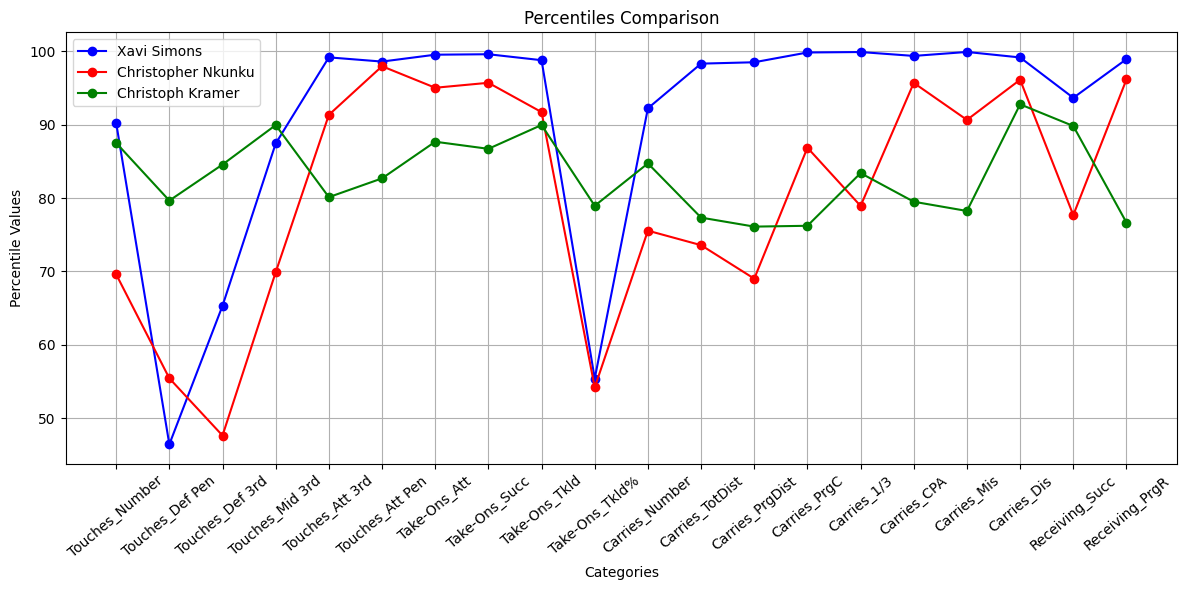

In [38]:
X_percentiles_df = pd.DataFrame(X_percentiles, index=df_features.index)
X_percentiles_df.columns = df_features.columns
X_percentiles_df = X_percentiles_df[feature_vector]

xavi_data = X_percentiles_df.loc['Xavi Simons']
nkunku_data = X_percentiles_df.loc['Christopher Nkunku']
n = X_percentiles_df.loc['Christoph Kramer']
# Create a line chart
plt.figure(figsize=(12, 6))

# Plot for Xavi Simons in blue
plt.plot(xavi_data.index, xavi_data.values, marker='o', color='blue', label=xavi_data.name)
plt.plot(nkunku_data.index, nkunku_data.values, marker='o', color='red', label=nkunku_data.name)
plt.plot(n.index, n.values, marker='o', color='green', label=n.name)

# Adding titles and labels
plt.title('Percentiles Comparison')
plt.xlabel('Categories')  # Change this to an appropriate label if needed
plt.ylabel('Percentile Values')
plt.xticks(rotation=40)
plt.grid()
plt.legend()  # Show legend to distinguish players
plt.tight_layout()

plt.show()